# Εργασία 1

## B. Αναγνώριση τύπων καρκίνου με βάση τα επίπεδα έκφρασης ακολουθιών RNA

### 1. Προετοιμασία των δεδομένων

In [1]:
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import sys

np.random.seed(0)

print('Python version:', sys.version)
print('scikit-learn version:', sklearn.__version__)
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version:', sns.__version__)

Python version: 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
scikit-learn version: 0.23.2
pandas version: 1.1.3
numpy version: 1.19.2
matplotlib version: 3.3.2
seaborn version: 0.11.0


In [2]:
import numpy as np
import urllib.request
import os

np.random.seed(0)

df_x = pd.read_csv('data.csv')
df_y = pd.read_csv('labels.csv')

In [3]:
df_x.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [4]:
df_x.drop(df_x.columns[0], axis=1, inplace=True)
df_x.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [5]:
df_y.drop(df_y.columns[0], axis=1, inplace=True)
df_y.head()

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA


In [6]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20531 entries, gene_0 to gene_20530
dtypes: float64(20531)
memory usage: 125.5 MB


In [7]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   801 non-null    object
dtypes: object(1)
memory usage: 6.4+ KB


<AxesSubplot:>

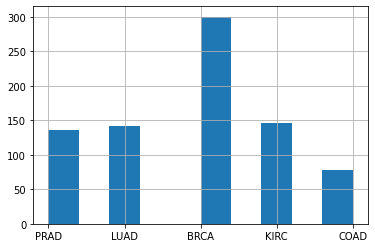

In [8]:
df_y = df_y['Class']
df_y.hist()

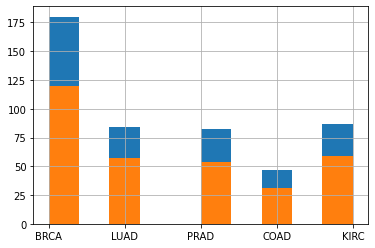

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=0)

for train_index, test_index in sss.split(df_x, df_y):
    df_train_x = df_x.loc[train_index]
    df_train_y = df_y.loc[train_index]
    df_test_x = df_x.loc[test_index]
    df_test_y = df_y.loc[test_index]
   
df_train_y.hist()
df_test_y.hist()
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

x_train = df_train_x.to_numpy()
y_train = df_train_y.to_numpy()
x_test = df_test_x.to_numpy()
y_test = df_test_y.to_numpy()

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

print('x_train.shape =', x_train.shape)
print('y_train.shape =', y_train.shape)
print('x_test.shape =', x_test.shape)
print('y_test.shape =', y_test.shape)

x_train.shape = (480, 20531)
y_train.shape = (480,)
x_test.shape = (321, 20531)
y_test.shape = (321,)


### 2. Μείωση διαστάσεων

Εφαρμόζεται κανονικοποίηση και μείωση των διαστάσεων με την τεχνική PCA διατηρώντας το 90% της διασποράς.

In [11]:
from sklearn import decomposition
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

pca = decomposition.PCA(n_components=0.9, svd_solver='full', random_state=0)
x_train_reduced = pca.fit_transform(x_train_scaled)

print('x_train.shape', x_train.shape)
print('x_train_reduced.shape =', x_train_reduced.shape)

x_train.shape (480, 20531)
x_train_reduced.shape = (480, 232)


Οι κλάσεις φαίνονται διαχωρίσιμες στο επίπεδο των δυο πρώτων ιδιοδιανυσμάτων.

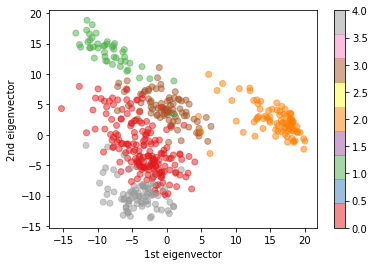

In [12]:
plt.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], c=y_train, cmap='Set1', alpha=0.5)
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.colorbar()
plt.show()

### 3. Αξιολόγηση μοντέλων

#### 3.1 Περιγραφή της διαδικασίας

Επιλέγεται να γίνει αξιολόγηση των μοντέλων για την αναζήτηση των βέλτιστων παραμέτρων με την τεχνική της διασταυρωμένης επικύρωσης επειδή τα παραδείγματα είναι λίγα. Για την αξιολόγηση επιλέγεται η μετρική F1 επειδή οι κλάσεις δεν είναι ζυγισμένες. Η συνάρτηση GridSearchCV εφαρμόζει k-fold cross-validation με k=5 και stratified shuffle split. Μετά απο κάθε split εφαρμόζεται κανονικοποίηση με τον MinMaxScaler, PCA και εκπαίδευση του μοντέλου. Αυτά τα 3 βήματα ομαδοποιούνται σε ένα pipeline. Όταν τελειώσει η διαδικασία του grid search δημιουργείται ένα διάγραμμα για το πώς αλλάζει το μέσο F1 ($\pm$std) στο training set και στο validation set καθώς αλλάζει μια παράμετρος και ένα αντίστοιχο διάγραμμα για τον χρόνο εκπαίδευσης. Στο τέλος εκπαιδεύεται το βέλτιστο μοντέλο εκ νέου σε ολόκληρο το training set και αξιολογείται στο test set.

In [13]:
def plot_grid_search(search, baseline_score_val, param1, param2=None, xscale='linear'):
    param1_key = 'clf__' + param1
    
    if param2 is None:
        x = [x['clf__' + param1] for x in search.cv_results_['params']]  
        mean_train_score = search.cv_results_['mean_train_score']
        mean_test_score = search.cv_results_['mean_test_score']
        mean_fit_time = search.cv_results_['mean_fit_time']
        std_train_score = search.cv_results_['std_train_score']
        std_test_score = search.cv_results_['std_test_score']
        std_fit_time = search.cv_results_['std_fit_time']
    else:
        param2_key = 'clf__' + param2
        x = []
        mean_train_score = []
        mean_test_score = []
        mean_fit_time = []
        std_train_score = []
        std_test_score = []
        std_fit_time = []
        val2 = search.best_params_[param2_key]
        all_mean_train_score = search.cv_results_['mean_train_score']
        all_mean_test_score = search.cv_results_['mean_test_score']
        all_mean_fit_time = search.cv_results_['mean_fit_time']
        all_std_train_score = search.cv_results_['std_train_score']
        all_std_test_score = search.cv_results_['std_test_score']
        all_std_fit_time = search.cv_results_['std_fit_time']
        
        for i, params in enumerate(search.cv_results_['params']):
            if params[param2_key] == val2:
                x.append(params[param1_key])
                mean_train_score.append(all_mean_train_score[i])
                mean_test_score.append(all_mean_test_score[i])
                mean_fit_time.append(all_mean_fit_time[i])
                std_train_score.append(all_std_train_score[i])
                std_test_score.append(all_std_test_score[i])
                std_fit_time.append(all_std_fit_time[i])
                
        mean_train_score = np.array(mean_train_score)
        mean_test_score = np.array(mean_test_score)
        mean_fit_time = np.array(mean_fit_time)
        std_train_score = np.array(std_train_score)
        std_test_score = np.array(std_test_score)
        std_fit_time = np.array(std_fit_time)
    
    baseline_score = np.full(len(x), baseline_score_val)
    
    if param2 is None:
        plt.title('Score')
    else:
        if isinstance(val2, float):
            plt.title('Score for ' + param2 + ' = ' + "{:.4f}".format(val2))
        else:
            plt.title('Score for ' + param2 + ' = ' + str(val2))
    plt.plot(x, mean_train_score, label='Train')
    plt.fill_between(x, mean_train_score-std_train_score, mean_train_score+std_train_score, alpha=0.2)
    plt.plot(x, mean_test_score, label='Validation')
    plt.fill_between(x, mean_test_score-std_test_score, mean_test_score+std_test_score, alpha=0.2)
    plt.plot(x, baseline_score, label='Baseline', linestyle='dotted')
    plt.xscale(xscale)
    plt.xlabel(param1)
    plt.ylabel('F1')
    plt.legend()
    plt.show()
    
    plt.title('Training time')
    plt.plot(x, mean_fit_time)
    plt.fill_between(x, mean_fit_time-std_fit_time, mean_fit_time+std_fit_time, alpha=0.2)
    plt.xscale('log')
    plt.xlabel(param1)
    plt.ylabel('Time (sec)')
    plt.show()

In [14]:
final_results = []

def evaluate_model(classifier_str, search):
    y_pred = search.predict(x_test)
    y_train_pred = search.predict(x_train)
    
    train_f1 = metrics.f1_score(y_train, y_train_pred, average='micro')
    test_f1 = metrics.f1_score(y_test, y_pred, average='micro')

    print('Training time = {} sec'.format(search.refit_time_))
    print('Accuracy =', metrics.accuracy_score(y_test, y_pred))
    print('Precision =', metrics.precision_score(y_test, y_pred, average='micro'))
    print('Recall =', metrics.recall_score(y_test, y_pred, average='micro'))
    print('F1 =', test_f1)
    print('Training F1 =', train_f1)
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    sns.heatmap(confusion_matrix, cmap="Oranges", annot=True)
    plt.title('Confusion matrix')
    plt.show()
    
    correct_indices = np.where(y_test == y_pred)[0]
    incorrect_indices = np.where(y_test != y_pred)[0]
    
    for i in correct_indices[:1]:
        print('Example of correct classification (y_pred = {}, y_test = {})'.format(y_pred[i], y_test[i]))
        print(df_test_x.iloc[i])
    print()
    for i in incorrect_indices[:1]:
        print('Example of misclassification (y_pred = {}, y_test = {})'.format(y_pred[i], y_test[i]))
        print(df_test_x.iloc[i])
    
    best_params_str = ''
    for param, value in search.best_params_.items():
        if best_params_str != '':
            best_params_str += ', '
        if param.startswith('clf__'):
            best_params_str += param[len('clf__'):]
        else:
            best_params_str += param
        best_params_str += ' = '
        if isinstance(value, float):
            best_params_str += '{:.4f}'.format(value)
        else:
            best_params_str += str(value)
    
    res = {
        'Classifier': classifier_str,
        'Parameters': best_params_str,
        'Training F1': "{:.4f}".format(train_f1),
        'Test F1': "{:.4f}".format(test_f1),
        'Training Time (sec)': "{:.5f}".format(search.refit_time_)
    }
    final_results.append(res)

#### 3.2 Dummy Classifier

Ο Dummy Classifier χρησιμοποίεται ως ένα απλό baseline για τη σύγκριση με τα άλλα μοντέλα. Επιλέγει πάντα την πιο συχνή ετικέτα στο training set.

In [15]:
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn import pipeline
from time import time

pipe = pipeline.Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('clf', DummyClassifier(strategy='most_frequent', random_state=0))])

t1 = time()
pipe.fit(x_train, y_train)
t2 = time()
y_pred = pipe.predict(x_test)
y_train_pred = pipe.predict(x_train)

train_f1 = metrics.f1_score(y_train, y_train_pred, average='micro')
dummy_f1 = metrics.f1_score(y_test, y_pred, average='micro')

print('Training time = {} sec'.format(t2 - t1))
print('Accuracy =', metrics.accuracy_score(y_test, y_pred))
print('Precision =', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall =', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 =', dummy_f1)
print('Training F1 =', train_f1)

res = {
    'Classifier': 'Dummy Classifier',
    'Parameters': "strategy = 'most_frequent'",
    'Training F1': "{:.4f}".format(train_f1),
    'Test F1': "{:.4f}".format(dummy_f1),
    'Training Time (sec)': "{:.4f}".format(t2 - t1)
}
final_results.append(res)

Training time = 0.8235740661621094 sec
Accuracy = 0.37383177570093457
Precision = 0.37383177570093457
Recall = 0.37383177570093457
F1 = 0.37383177570093457
Training F1 = 0.375


#### 3.3 Linear SVM

Η βελτιστοποίηση του svm.SVC με linear kernel πραγματοποιείται ως προς την παράμετρο C.  Το C είναι η παράμετρος αντιστάθμισης μεταξύ της προσπάθειας για μέγιστο περιθώριο μεταξύ των κλάσεων και για ελάχιστο αριθμό λαθών.

$ Loss = \mathbf{w}^T\mathbf{w} + C\sum_{k=1}^R\varepsilon_{k}\ $

Kernel: $ K(\mathbf{x}, \mathbf{x}') = \langle\mathbf{x},\mathbf{x}'\rangle $

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pipe = pipeline.Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('clf', SVC(kernel='linear'))
])

param_grid = {
    'clf__C': (0.001, 0.01, 0.1, 1., 10., 100., 1000.)
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, scoring='f1_micro', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.9979166666666666
Best params = {'clf__C': 0.001}


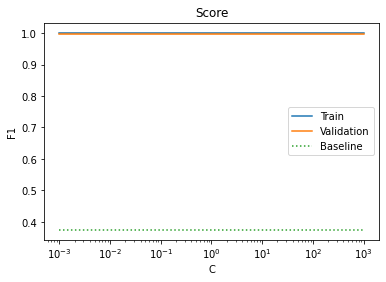

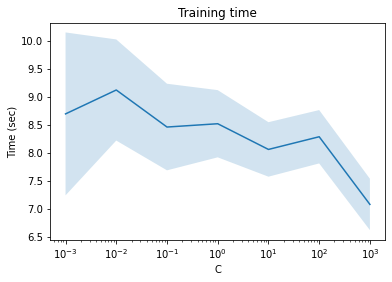

In [17]:
plot_grid_search(search, dummy_f1, 'C', xscale='log')

Training time = 1.0177860260009766 sec
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 = 1.0
Training F1 = 1.0


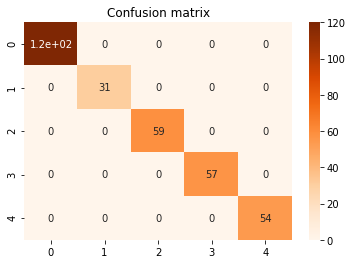

Example of correct classification (y_pred = 2, y_test = 2)
gene_0         0.000000
gene_1         0.825704
gene_2         2.842959
gene_3         7.206262
gene_4         9.232987
                ...    
gene_20526    12.265785
gene_20527    10.040714
gene_20528     9.580466
gene_20529     5.056774
gene_20530     0.000000
Name: 170, Length: 20531, dtype: float64



In [18]:
evaluate_model('Linear SVM', search)

#### 3.4 Polynomial SVM

Η βελτιστοποίηση του svm.SVC με polynomial kernel πραγματοποιείται ως προς τις παραμέτρους C και degree. Το degree είναι ο βαθμός του πολυωνύμου. Το gamma έχει την default τιμή 'scale' και υπολογίζεται ως gamma = 1/(n_features*X.var()).

Kernel: $ K(\mathbf{x}, \mathbf{x}') = (\gamma\langle\mathbf{x},\mathbf{x}'\rangle+r)^d $

In [19]:
pipe = pipeline.Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('clf', SVC(kernel='poly'))
])

param_grid = {
    'clf__C': (0.001, 0.01, 0.1, 1., 10., 100., 1000.),
    'clf__degree': (2, 3, 4, 5)
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, scoring='f1_micro', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.9854166666666666
Best params = {'clf__C': 10.0, 'clf__degree': 2}


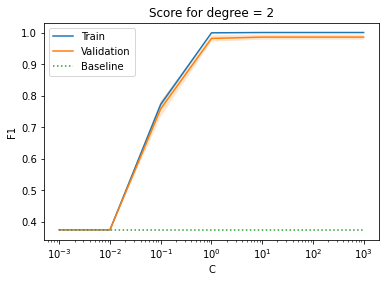

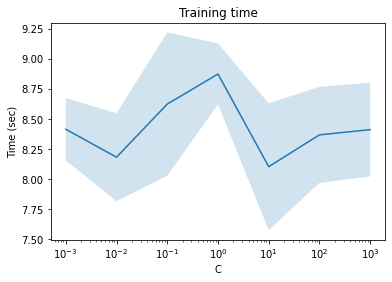

In [20]:
plot_grid_search(search, dummy_f1, 'C', param2='degree', xscale='log')

Training time = 1.1125366687774658 sec
Accuracy = 0.9875389408099688
Precision = 0.9875389408099688
Recall = 0.9875389408099688
F1 = 0.9875389408099688
Training F1 = 1.0


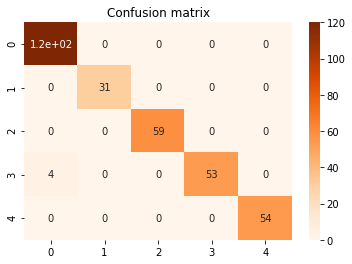

Example of correct classification (y_pred = 2, y_test = 2)
gene_0         0.000000
gene_1         0.825704
gene_2         2.842959
gene_3         7.206262
gene_4         9.232987
                ...    
gene_20526    12.265785
gene_20527    10.040714
gene_20528     9.580466
gene_20529     5.056774
gene_20530     0.000000
Name: 170, Length: 20531, dtype: float64

Example of misclassification (y_pred = 0, y_test = 3)
gene_0         0.000000
gene_1         4.854180
gene_2         4.593115
gene_3         7.883945
gene_4         9.692160
                ...    
gene_20526    10.184181
gene_20527    10.089013
gene_20528     9.959524
gene_20529     8.213099
gene_20530     0.733875
Name: 266, Length: 20531, dtype: float64


In [21]:
evaluate_model('Polynomial SVM', search)

#### 3.5 RBF SVM

Η βελτιστοποίηση του svm.SVC με rbf kernel πραγματοποιείται ως προς τις παραμέτρους C και gamma. Το gamma δείχνει πόσο μακριά φτάνει η επιρροή ενός παραδείγματος.

Kernel: $ K(\mathbf{x}, \mathbf{x}') = e^{-\gamma||\mathbf{x}-\mathbf{x}'||^2} $

In [ ]:
pipe = pipeline.Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('clf', SVC(kernel='rbf'))
])

param_grid = {
    'clf__C': (0.001, 0.01, 0.1, 1., 10., 100., 1000.),
    'clf__gamma': (0.001, 0.01, 0.1, 1., 10., 100., 1000.)
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, scoring='f1_micro', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

In [ ]:
plot_grid_search(search, dummy_f1, 'C', param2='gamma', xscale='log')

In [ ]:
evaluate_model('RBF SVM', search)

#### 3.6 Sigmoid SVM

Η βελτιστοποίηση του svm.SVC με sigmoid kernel πραγματοποιείται ως προς τις παραμέτρους C και gamma.

Kernel: $ K(\mathbf{x}, \mathbf{x}') = tanh(\gamma\langle\mathbf{x},\mathbf{x}'\rangle+r) $

In [ ]:
pipe = pipeline.Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('clf', SVC(kernel='sigmoid'))
])

param_grid = {
    'clf__C': (0.001, 0.01, 0.1, 1., 10., 100., 1000.),
    'clf__gamma': (0.001, 0.01, 0.1, 1., 10., 100., 1000.)
}

search = GridSearchCV(pipe, param_grid, n_jobs=-1, scoring='f1_micro', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

In [ ]:
plot_grid_search(search, dummy_f1, 'C', param2='gamma', xscale='log')

In [ ]:
evaluate_model('Sigmoid SVM', search)

#### 3.7 Nearest Neighbors

Η βελτιστοποίηση του sklearn.neighbors.KNeighborsClassifier πραγματοποιείται ως προς τις παραμέτρους n_neighbors και p. Στον πολυδιάστατο χώρο των χαρακτηριστικών οι k πλησιέστεροι γείτονες του κάθε δείγματος ψηφίζουν για να αποφασίσουν την κλάση στην οποία ανήκει. Για να βρεθούν οι πλησιέστεροι γείτονες χρησιμοποιείται η απόσταση minkowski:

$d_p(\mathbf{x}, \mathbf{y}) = \sqrt[p]{\sum_{i}|x_i-y_i|^p}$

In [ ]:
from sklearn.neigbors import KNeighborsClassifier

pipe = pipeline.Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('clf', KNeighborsClassifier())
])

param_grid = {
    'clf__n_neighbors': np.arange(1, 20),
    'clf__p': np.arange(1, 5)
}

search = model_selection.GridSearchCV(pipe, param_grid, n_jobs=-1, scoring='f1_micro', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

In [ ]:
plot_grid_search(search, dummy_f1, 'n_neighbors', param2='p')

In [ ]:
evaluate_model('Nearest Neighbors', search)

#### 3.8 Nearest Class Centroid

Η βελτιστοποίηση του sklearn.neighbors.NearestCentroid πραγματοποιείται ως προς το shrink_threshold. Κάθε κλάση αντιπροσωπεύεται απο το centroid των μελών της.

In [ ]:
from sklearn.neighbors import NearestCentroid

pipe = pipeline.Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('clf', NearestCentroid())
])

param_grid = {
    'clf__shrink_threshold': np.arange(0, 1.1, 0.01)
}

search = model_selection.GridSearchCV(pipe, param_grid, n_jobs=-1, scoring='f1_micro', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

In [ ]:
plot_grid_search(search, dummy_f1, 'shrink_threshold')

In [ ]:
evaluate_model('Nearest Class Centroid', search)

### 4. Σύνοψη αποτελεσμάτων

In [ ]:
final_results_df = pd.DataFrame(final_results)
final_results_df = final_results_df.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
final_results_df.set_properties(**{'text-align': 'left'}).hide_index()